# CYBERML - Project

## Importation du dataset

In [386]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [387]:
# file1_path = "../SWaT.A7_June 2020/22June2020 (1).xlsx"
# file2_path = "../SWaT.A7_June 2020/22June2020 (2).xlsx"
# file3_path = "../SWaT.A7_June 2020/29June2020 (1).xlsx"
# file4_path = "../SWaT.A7_June 2020/29June2020 (2).xlsx"

# df1 = pd.read_excel(file1_path)
# df2 = pd.read_excel(file2_path)
# df3 = pd.read_excel(file3_path, usecols=range(61))
# df4 = pd.read_excel(file4_path)
# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)

In [388]:
# print(df1.columns.to_list())
# print(df2.columns.to_list())
# print(df3.columns.to_list())
# print(df4.columns.to_list())

In [389]:
# common_columns = list(set(df1.columns) & set(df2.columns) & set(df3.columns) & set(df4.columns))
# # columns in df1 but not in common_columns
# missing_columns = list(set(df1.columns) - set(common_columns))
# print(missing_columns)
# print(len(missing_columns))
# print(len(common_columns))

# print(f"Missing columns : {list(set(df1.columns) ^ set(df2.columns) ^ set(df3.columns) ^ set(df4.columns))}")

In [390]:
# df1 = df1[common_columns]
# df2 = df2[common_columns]
# df3 = df3[common_columns]
# df4 = df4[common_columns]
# print(df1.columns.to_list())
# print(df2.columns.to_list())
# print(df3.columns.to_list())
# print(df4.columns.to_list())

In [391]:
# if list(df1.columns) != list(df2.columns) or list(df1.columns) != list(df3.columns) or list(df1.columns) != list(df4.columns):
#     print("Les colonnes des deux fichiers ne correspondent pas.")
#     print("Colonnes dans le fichier 1 :", df1.columns)
#     print("Colonnes dans le fichier 2 :", df2.columns)
#     print("Colonnes dans le fichier 3 :", df3.columns)
#     print("Colonnes dans le fichier 4 :", df4.columns)
# else:
#     print("Les colonnes des deux fichiers correspondent.")
#     df_combined = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

#     # Vérifier le nombre de lignes et de colonnes du dataset combiné
#     print(f"Dataset combiné : {df_combined.shape} lignes et colonnes")

#     # Sauvegarder le dataset combiné dans un fichier CSV
#     output_path = "../SWaT.A7_June 2020/df_combined.csv"
#     df_combined.to_csv(output_path, index=False)

#     print(f"Dataset fusionné sauvegardé dans : {output_path}")

In [392]:
df = pd.read_csv("../SWaT.A7_June 2020/df_combined.csv", low_memory=False)

In [393]:
df.shape

(32402, 61)

In [394]:
df.tail()

,LIT301.Pv,MV301.Status,MV504.Status,AIT201.Pv,MV304.Status,FIT101.Pv,UV401.Status,LIT401.Pv,P6_STATE,MV302.Status,AIT402.Pv,P601.Status,AIT503.Pv,FIT502.Pv,FIT201.Pv,P302.Status,P403.Status,FIT504.Pv,PIT502.Pv,P602.Status,P501.Status,AIT202.Pv,PIT503.Pv,P402.Status,P202.Status,MV303.Status,AIT401.Pv,P101.Status,MV501.Status,FIT601.Pv,P301.Status,P5_STATE,AIT501.Pv,P201.Status,P206.Status,LIT101.Pv,MV101.Status,P2_STATE,P204.Status,FIT503.Pv,MV503.Status,AIT502.Pv,P205.Status,P404.Status,P502.Status,P401.Status,P4_STATE,t_stamp,P203.Status,FIT401.Pv,MV502.Status,P1_STATE,P102.Status,DPIT301.Pv,AIT203.Pv,MV201.Status,PIT501.Pv,AIT504.Pv,P3_STATE,FIT501.Pv,FIT301.Pv
32397,979.2762,1,1,34.2540359,1,0,2,924.07074,2,2,0,1,31.498333,1.16946328,2.32762,1,1,0,2.14654136,1,2,8.310562,202.656372,1,1,1,0,2,2,0.000320379331,2,12,7.35663939,2,1,654.461243,1,2,1,0.1138175,1,260,2,1,1,2,4,2020-06-29 15:29:56,2,1.33376014,2,3,1,14.9273319,101.948219,2,228.547164999999,0.692130199999999,7,1.34324539,1.84031
32398,979.2762,1,1,34.2540359,1,0,2,924.455261,2,2,0,1,31.498333,1.18957353,2.33197713,1,1,0,2.14654136,1,2,8.307037,202.656372,1,1,1,0,2,2,0.000320379331,2,12,7.35535765,2,1,653.9117,1,2,1,0.1138175,1,260,2,1,1,2,4,2020-06-29 15:29:57,2,1.33299184,2,3,1,14.9273319,101.948219,2,228.547164999999,0.692130199999999,7,1.34478343,1.84031
32399,978.95575,1,1,34.2540359,1,0,2,924.4937,2,2,0,1,31.6905918,1.1971308,2.3372314,1,1,0,2.14654136,1,2,8.303833,202.656372,1,1,1,0,2,2,0.000320379331,2,12,7.35503699999999,2,1,653.3622,1,2,1,0.1138175,1,260,2,1,1,2,4,2020-06-29 15:29:58,2,1.33299184,2,3,1,14.9273319,101.948219,2,228.547164999999,0.692130199999999,7,1.34632146,1.84031
32400,979.47644,1,1,34.2540359,1,0,2,924.4168,2,2,0,1,31.6905918,1.20494425,2.34197283,1,1,0,2.14654136,1,2,8.30191,202.656372,1,1,1,0,2,2,0.000320379331,2,12,7.351192,2,1,652.9696,1,2,1,0.1138175,1,260,2,1,1,2,4,2020-06-29 15:29:59,2,1.33299184,2,3,1,14.9273319,101.948219,2,228.547164999999,0.692130199999999,7,1.34632146,1.84402514
32401,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,2020-06-29 15:30:00,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input,Bad Input


In [395]:
df = df.drop(df.tail(1).index)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32401 entries, 0 to 32400
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LIT301.Pv     32401 non-null  object
 1   MV301.Status  32401 non-null  object
 2   MV504.Status  32401 non-null  object
 3   AIT201.Pv     32401 non-null  object
 4   MV304.Status  32401 non-null  object
 5   FIT101.Pv     32401 non-null  object
 6   UV401.Status  32401 non-null  object
 7   LIT401.Pv     32401 non-null  object
 8   P6_STATE      32401 non-null  object
 9   MV302.Status  32401 non-null  object
 10  AIT402.Pv     32401 non-null  object
 11  P601.Status   32401 non-null  object
 12  AIT503.Pv     32401 non-null  object
 13  FIT502.Pv     32401 non-null  object
 14  FIT201.Pv     32401 non-null  object
 15  P302.Status   32401 non-null  object
 16  P403.Status   32401 non-null  object
 17  FIT504.Pv     32401 non-null  object
 18  PIT502.Pv     32401 non-null  object
 19  P602

In [397]:
df.describe()

,LIT301.Pv,MV301.Status,MV504.Status,AIT201.Pv,MV304.Status,FIT101.Pv,UV401.Status,LIT401.Pv,P6_STATE,MV302.Status,AIT402.Pv,P601.Status,AIT503.Pv,FIT502.Pv,FIT201.Pv,P302.Status,P403.Status,FIT504.Pv,PIT502.Pv,P602.Status,P501.Status,AIT202.Pv,PIT503.Pv,P402.Status,P202.Status,MV303.Status,AIT401.Pv,P101.Status,MV501.Status,FIT601.Pv,P301.Status,P5_STATE,AIT501.Pv,P201.Status,P206.Status,LIT101.Pv,MV101.Status,P2_STATE,P204.Status,FIT503.Pv,MV503.Status,AIT502.Pv,P205.Status,P404.Status,P502.Status,P401.Status,P4_STATE,t_stamp,P203.Status,FIT401.Pv,MV502.Status,P1_STATE,P102.Status,DPIT301.Pv,AIT203.Pv,MV201.Status,PIT501.Pv,AIT504.Pv,P3_STATE,FIT501.Pv,FIT301.Pv
count,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401,32401
unique,5406,3,3,1817,3,307,2,7873,2,3,1,2,613,1043,1003,1,1,3,213,2,2,5838,781,1,1,3,1,2,3,169,2,17,1369,2,1,5868,3,2,1,127,3,1282,2,1,1,2,4,32401,2,688,3,3,1,1125,2954,3,799,358,14,723,1690
top,1006.75311,1,1,18.0722885,1,0.0,2,1006.20355,2,1,0,1,46.91105,0.00192135269999999,0.000256303465,1,1,0,2.05042768,1,2,9.640348,7.8345294,1,1,1,0,1,2,0.000256303465,1,12,7.264676,1,1,613.9524,1,2,1,0.00217648758999999,1,260,1,1,1,2,4,2020-06-22 10:00:00,1,0.000512196699999999,2,2,1,3.534157,130.376831,1,12.352602,1.69187391,7,0.00230710068999999,0.0006405534
freq,1363,32213,31745,3802,31521,19082,22260,296,27785,16622,32401,25873,3673,8262,11524,32401,32401,25200,4056,32278,21960,49,938,32401,32401,31955,32401,17350,24192,23697,16321,24016,110,17725,32401,271,29725,27785,32401,6936,31839,7200,17725,32401,32401,22278,27881,1,17765,9074,24092,15255,32401,1641,212,17205,1474,2914,15481,4657,10308


In [398]:
df.isnull().sum()

LIT301.Pv       0
MV301.Status    0
MV504.Status    0
AIT201.Pv       0
MV304.Status    0
               ..
PIT501.Pv       0
AIT504.Pv       0
P3_STATE        0
FIT501.Pv       0
FIT301.Pv       0
Length: 61, dtype: int64

In [399]:
pd.set_option('display.max_columns', None)
df.columns

Index(['LIT301.Pv', 'MV301.Status', 'MV504.Status', 'AIT201.Pv',
       'MV304.Status', 'FIT101.Pv', 'UV401.Status', 'LIT401.Pv', 'P6_STATE',
       'MV302.Status', 'AIT402.Pv', 'P601.Status', 'AIT503.Pv', 'FIT502.Pv',
       'FIT201.Pv', 'P302.Status', 'P403.Status', 'FIT504.Pv', 'PIT502.Pv',
       'P602.Status', 'P501.Status', 'AIT202.Pv', 'PIT503.Pv', 'P402.Status',
       'P202.Status', 'MV303.Status', 'AIT401.Pv', 'P101.Status',
       'MV501.Status', 'FIT601.Pv', 'P301.Status', 'P5_STATE', 'AIT501.Pv',
       'P201.Status', 'P206.Status', 'LIT101.Pv', 'MV101.Status', 'P2_STATE',
       'P204.Status', 'FIT503.Pv', 'MV503.Status', 'AIT502.Pv', 'P205.Status',
       'P404.Status', 'P502.Status', 'P401.Status', 'P4_STATE', 't_stamp',
       'P203.Status', 'FIT401.Pv', 'MV502.Status', 'P1_STATE', 'P102.Status',
       'DPIT301.Pv', 'AIT203.Pv', 'MV201.Status', 'PIT501.Pv', 'AIT504.Pv',
       'P3_STATE', 'FIT501.Pv', 'FIT301.Pv'],
      dtype='object')

### Pré-traitement des données

In [400]:
df = df.dropna()
df.isnull().sum()

LIT301.Pv       0
MV301.Status    0
MV504.Status    0
AIT201.Pv       0
MV304.Status    0
               ..
PIT501.Pv       0
AIT504.Pv       0
P3_STATE        0
FIT501.Pv       0
FIT301.Pv       0
Length: 61, dtype: int64

In [401]:
columns_to_encode = [column for column in df.columns if df[column].nunique() < 20]
print(columns_to_encode)
print(len(columns_to_encode))

['MV301.Status', 'MV504.Status', 'MV304.Status', 'UV401.Status', 'P6_STATE', 'MV302.Status', 'AIT402.Pv', 'P601.Status', 'P302.Status', 'P403.Status', 'FIT504.Pv', 'P602.Status', 'P501.Status', 'P402.Status', 'P202.Status', 'MV303.Status', 'AIT401.Pv', 'P101.Status', 'MV501.Status', 'P301.Status', 'P5_STATE', 'P201.Status', 'P206.Status', 'MV101.Status', 'P2_STATE', 'P204.Status', 'MV503.Status', 'P205.Status', 'P404.Status', 'P502.Status', 'P401.Status', 'P4_STATE', 'P203.Status', 'MV502.Status', 'P1_STATE', 'P102.Status', 'MV201.Status', 'P3_STATE']
38


In [402]:
df = pd.get_dummies(df, drop_first=True, columns=columns_to_encode)

In [403]:
df['t_stamp'] = pd.to_datetime(df['t_stamp'], format='mixed')
df_22 = df[df['t_stamp'].dt.day == 22]
df_29 = df[df['t_stamp'].dt.day == 29]
start_time_29 = df_29['t_stamp'].min()
end_time_29 = df_29['t_stamp'].max()
start_time_22 = df_22['t_stamp'].min()
end_time_22 = df_22['t_stamp'].max()
print(f"22nd of June started at : {start_time_22} and ended at : {end_time_22}")
print(f"29th of June started at : {start_time_29} and ended at : {end_time_29}")

22nd of June started at : 2020-06-22 09:00:00 and ended at : 2020-06-22 14:01:10.990000
29th of June started at : 2020-06-29 10:00:00 and ended at : 2020-06-29 15:29:59


In [404]:
df_22.set_index('t_stamp', inplace=True)
df_29.set_index('t_stamp', inplace=True)

In [405]:
scaler = StandardScaler()
df_22_scaled = scaler.fit_transform(df_22)
df_22_scaled = pd.DataFrame(df_22_scaled, columns=df_22.columns)
df_29_scaled = scaler.fit_transform(df_29)
df_29_scaled = pd.DataFrame(df_29_scaled, columns=df_29.columns)
df_scaled = pd.concat([df_22_scaled, df_29_scaled], axis=0)
df_scaled.head()

,LIT301.Pv,AIT201.Pv,FIT101.Pv,LIT401.Pv,AIT503.Pv,FIT502.Pv,FIT201.Pv,PIT502.Pv,AIT202.Pv,PIT503.Pv,FIT601.Pv,AIT501.Pv,LIT101.Pv,FIT503.Pv,AIT502.Pv,FIT401.Pv,DPIT301.Pv,AIT203.Pv,PIT501.Pv,AIT504.Pv,FIT501.Pv,FIT301.Pv,MV301.Status_1,MV301.Status_2,MV504.Status_1,MV504.Status_2,MV304.Status_1,MV304.Status_2,UV401.Status_2,P6_STATE_2,MV302.Status_1,MV302.Status_2,P601.Status_2,FIT504.Pv_0.0,FIT504.Pv_6.405534e-05,P602.Status_2,P501.Status_2,MV303.Status_1,MV303.Status_2,P101.Status_2,MV501.Status_1,MV501.Status_2,P301.Status_2,P5_STATE_10,P5_STATE_11,P5_STATE_12,P5_STATE_13,P5_STATE_15,P5_STATE_16,P5_STATE_17,P5_STATE_18,P5_STATE_19,P5_STATE_21,P5_STATE_3,P5_STATE_4,P5_STATE_5,P5_STATE_6,P5_STATE_8,P5_STATE_9,P201.Status_2,MV101.Status_1,MV101.Status_2,P2_STATE_2,MV503.Status_1,MV503.Status_2,P205.Status_2,P401.Status_2,P4_STATE_2,P4_STATE_3,P4_STATE_4,P203.Status_2,MV502.Status_1,MV502.Status_2,P1_STATE_2,P1_STATE_3,MV201.Status_1,MV201.Status_2,P3_STATE_10,P3_STATE_12,P3_STATE_13,P3_STATE_14,P3_STATE_15,P3_STATE_16,P3_STATE_2,P3_STATE_4,P3_STATE_5,P3_STATE_6,P3_STATE_7,P3_STATE_9,P3_STATE_99
0,0.967036,-0.749154,-0.217778,-0.400634,-0.396841,0.710634,-0.806364,0.024663,-0.755583,0.706508,-0.077618,0.332407,-0.382391,0.704228,-0.783706,0.683918,-1.022033,0.155874,0.70593,-0.107304,0.680738,-1.053379,0.089172,-0.074367,0.169205,-0.159946,0.176533,-0.157184,0.699166,0.150948,1.021112,-1.010387,-0.482048,0.0,0.0,-0.072066,0.71934,0.13771,-0.129303,-0.804828,-0.520583,0.522996,-1.041296,-0.033352,-0.030746,0.535639,-0.040171,-0.031639,-0.032506,-0.033352,-0.031639,-0.06425,-0.023577,-0.033352,-0.10438,-0.007454,-0.056856,-0.031639,-0.033352,-0.799777,0.218192,-0.215948,0.150948,0.155693,-0.144268,-0.799777,0.69811,-0.023577,-0.01826,0.12774,-0.799777,-0.527043,0.529881,-1.847682,1.973313,0.813004,-0.805578,-0.039471,-0.071675,-0.007454,-0.039471,-0.040859,-0.087897,-0.046598,-0.110723,-0.060201,-0.061124,-1.001557,-0.038759,-0.433998
1,0.967036,-0.748193,-0.217778,-0.401956,-0.396841,0.712522,-0.806364,0.024663,-0.761180,0.706508,-0.077618,0.299725,-0.384191,0.704228,-0.783706,0.683918,-1.022033,0.155874,0.70593,-0.107304,0.680738,-1.053379,0.089172,-0.074367,0.169205,-0.159946,0.176533,-0.157184,0.699166,0.150948,1.021112,-1.010387,-0.482048,0.0,0.0,-0.072066,0.71934,0.13771,-0.129303,-0.804828,-0.520583,0.522996,-1.041296,-0.033352,-0.030746,0.535639,-0.040171,-0.031639,-0.032506,-0.033352,-0.031639,-0.06425,-0.023577,-0.033352,-0.10438,-0.007454,-0.056856,-0.031639,-0.033352,-0.799777,0.218192,-0.215948,0.150948,0.155693,-0.144268,-0.799777,0.69811,-0.023577,-0.01826,0.12774,-0.799777,-0.527043,0.529881,-1.847682,1.973313,0.813004,-0.805578,-0.039471,-0.071675,-0.007454,-0.039471,-0.040859,-0.087897,-0.046598,-0.110723,-0.060201,-0.061124,-1.001557,-0.038759,-0.433998
2,0.967036,-0.748193,-0.217778,-0.402544,-0.396841,0.712522,-0.806364,0.024663,-0.767895,0.706508,-0.077618,0.299725,-0.386441,0.704228,-0.783706,0.683918,-1.022033,0.155874,0.70593,-0.107304,0.680738,-1.053379,0.089172,-0.074367,0.169205,-0.159946,0.176533,-0.157184,0.699166,0.150948,1.021112,-1.010387,-0.482048,0.0,0.0,-0.072066,0.71934,0.13771,-0.129303,-0.804828,-0.520583,0.522996,-1.041296,-0.033352,-0.030746,0.535639,-0.040171,-0.031639,-0.032506,-0.033352,-0.031639,-0.06425,-0.023577,-0.033352,-0.10438,-0.007454,-0.056856,-0.031639,-0.033352,-0.799777,0.218192,-0.215948,0.150948,0.155693,-0.144268,-0.799777,0.69811,-0.023577,-0.01826,0.12774,-0.799777,-0.527043,0.529881,-1.847682,1.973313,0.813004,-0.805578,-0.039471,-0.071675,-0.007454,-0.039471,-0.040859,-0.087897,-0.046598,-0.110723,-0.060201,-0.061124,-1.001557,-0.038759,-0.433998
3,0.967036,-0.748193,-0.217778,-0.402838,-0.396841,0.724318,-0.806364,0.024663,-0.772746,0.706508,-0.077618,0.299725,-0.386441,0.704228,-0.789460,0.683918,-1.022033,0.155874,0.70593,-0.107304,0.680738,-1.053379,0.089172,-0.074367,0.169205,-0.159946,0.176533,-0.157184,0.699166,0.150948,1.021112,-1.010387,-0.482048,0.0,0.0,-0

## Option 1 : Anomaly Detection

### Isolation Forest

In [406]:
contamination = 0.02
duration = end_time_29 - start_time_29
print(f"We expect to be attacked for a duration of about {(contamination * duration).seconds} seconds")

model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)

model.fit(df_22_scaled)
df_29.loc[:, "Anomalie"] = model.predict(df_29_scaled)
df_22.loc[:, "Anomalie"] = 1

df_if = pd.concat([df_22, df_29], axis=0)
df_if.head()

We expect to be attacked for a duration of about 395 seconds


/tmp/ipykernel_7946/3848145625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_29.loc[:, "Anomalie"] = model.predict(df_29_scaled)
/tmp/ipykernel_7946/3848145625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22.loc[:, "Anomalie"] = 1


,LIT301.Pv,AIT201.Pv,FIT101.Pv,LIT401.Pv,AIT503.Pv,FIT502.Pv,FIT201.Pv,PIT502.Pv,AIT202.Pv,PIT503.Pv,FIT601.Pv,AIT501.Pv,LIT101.Pv,FIT503.Pv,AIT502.Pv,FIT401.Pv,DPIT301.Pv,AIT203.Pv,PIT501.Pv,AIT504.Pv,FIT501.Pv,FIT301.Pv,MV301.Status_1,MV301.Status_2,MV504.Status_1,MV504.Status_2,MV304.Status_1,MV304.Status_2,UV401.Status_2,P6_STATE_2,MV302.Status_1,MV302.Status_2,P601.Status_2,FIT504.Pv_0.0,FIT504.Pv_6.405534e-05,P602.Status_2,P501.Status_2,MV303.Status_1,MV303.Status_2,P101.Status_2,MV501.Status_1,MV501.Status_2,P301.Status_2,P5_STATE_10,P5_STATE_11,P5_STATE_12,P5_STATE_13,P5_STATE_15,P5_STATE_16,P5_STATE_17,P5_STATE_18,P5_STATE_19,P5_STATE_21,P5_STATE_3,P5_STATE_4,P5_STATE_5,P5_STATE_6,P5_STATE_8,P5_STATE_9,P201.Status_2,MV101.Status_1,MV101.Status_2,P2_STATE_2,MV503.Status_1,MV503.Status_2,P205.Status_2,P401.Status_2,P4_STATE_2,P4_STATE_3,P4_STATE_4,P203.Status_2,MV502.Status_1,MV502.Status_2,P1_STATE_2,P1_STATE_3,MV201.Status_1,MV201.Status_2,P3_STATE_10,P3_STATE_12,P3_STATE_13,P3_STATE_14,P3_STATE_15,P3_STATE_16,P3_STATE_2,P3_STATE_4,P3_STATE_5,P3_STATE_6,P3_STATE_7,P3_STATE_9,P3_STATE_99,Anomalie
t_stamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22 10:00:00.000,1006.75311,18.0722885,0.0,632.1841,46.91105,1.1651082,0.000256303465,2.0183897,7.51941824,206.9982,0.000256303465,7.61554766,695.2841,0.116122015,149.6283,1.29419291,3.44132137,135.708786,232.376312,1.84568059,1.29928231,0.0006405534,True,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2020-06-22 10:00:01.000,1006.75311,18.104332,0.0,631.838,46.91105,1.16613293,0.000256303465,2.0183897,7.51461172,206.9982,0.000256303465,7.61234331,695.1271,0.116122015,149.6283,1.29419291,3.44132137,135.708786,232.376312,1.84568059,1.29928231,0.0006405534,True,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2020-06-22 10:00:02.005,1006.75311,18.104332,0.0,631.6842,46.91105,1.16613293,0.000256303465,2.0183897,7.508844,206.9982,0.000256303465,7.61234331,694.930847,0.116122015,149.6283,1.29419291,3.44132137,135.708786,232.376312,1.84568059,1.29928231,0.0006405534,True,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2020-06-22 10:00:03.010,1006.75311,18.104332,0.0,631.6073,46.91105,1.17253745,0.000256303465,2.0183897,7.50467825,206.9982,0.000256303465,7.61234331,694.930847,0.116122015,149.525757,1.29419291,3.44132137,135.708786,232.376312,1.84568059,1.29928231,0.0006405534,True,False,True,False,True,False,True,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2020-06-22 10:00:04.015,1006.75311,18.104332,0.0,631.2997,46.91105,1.16959143,0.000256303465,2.0183897,7.498911,206.9982,0.000256303465,7.611382,694.8523,0.116122015,149.525757

In [407]:
df_if['Anomalie_Label'] = df_if['Anomalie'].apply(lambda x: 'Normal' if x == 1 else 'Anomalie')
df_if['Anomalie_Label'].value_counts()

Anomalie_Label
Normal      32293
Anomalie      108
Name: count, dtype: int64

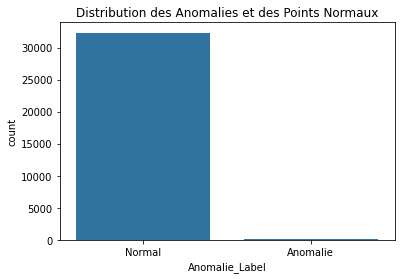

In [408]:
sns.countplot(x='Anomalie_Label', data=df_if)
plt.title("Distribution des Anomalies et des Points Normaux")
plt.show()

#### Some examples of easily separable data

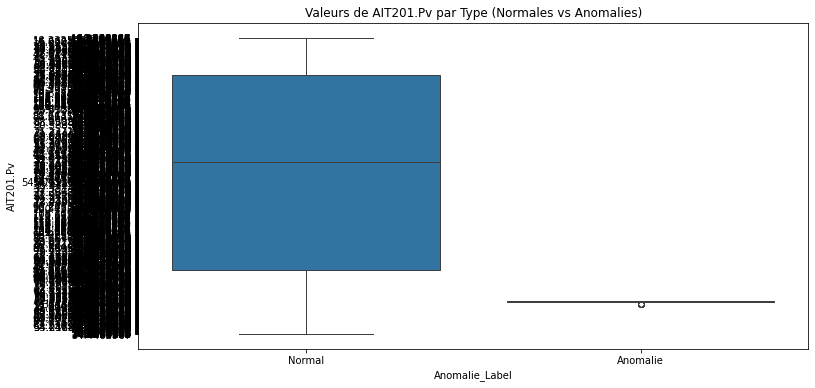

In [409]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Anomalie_Label', y='AIT201.Pv', data=df_if)
plt.title("Valeurs de AIT201.Pv par Type (Normales vs Anomalies)")
plt.show()

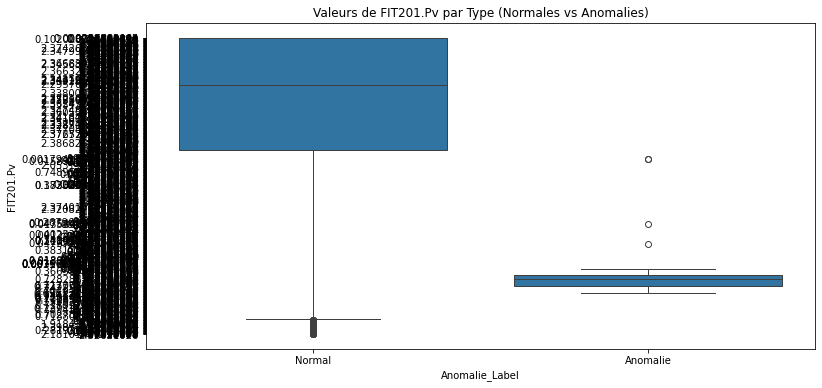

In [410]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Anomalie_Label', y='FIT201.Pv', data=df_if)
plt.title("Valeurs de FIT201.Pv par Type (Normales vs Anomalies)")
plt.show()

In [411]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

df_if['PCA1'] = reduced_data[:, 0]
df_if['PCA2'] = reduced_data[:, 1]

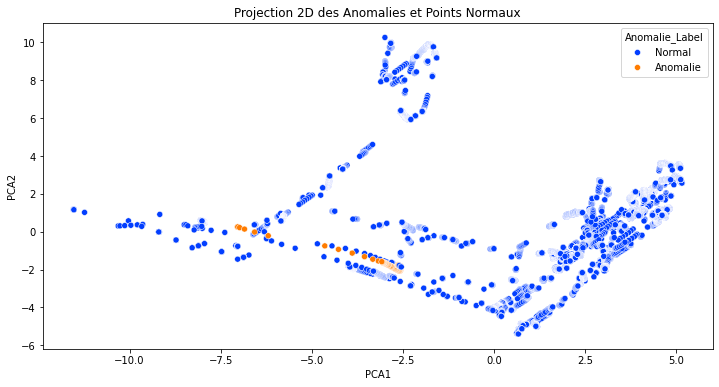

In [412]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomalie_Label', palette='bright', data=df_if)
plt.title("Projection 2D des Anomalies et Points Normaux")
plt.show()

### One Class SVM

In [413]:
svm = OneClassSVM(nu=0.02, kernel='rbf', gamma=0.001)
svm.fit(df_22_scaled)
df_29.loc[:, "Anomalie"] = svm.predict(df_29_scaled)
df_22.loc[:, "Anomalie"] = 1

df_svm = pd.concat([df_22, df_29], axis=0)
df_svm['Anomalie_Label'] = df_svm['Anomalie'].apply(lambda x: 'Normal' if x == 1 else 'Anomalie')
df_svm['Anomalie_Label'].value_counts()

Anomalie_Label
Normal      32179
Anomalie      222
Name: count, dtype: int64

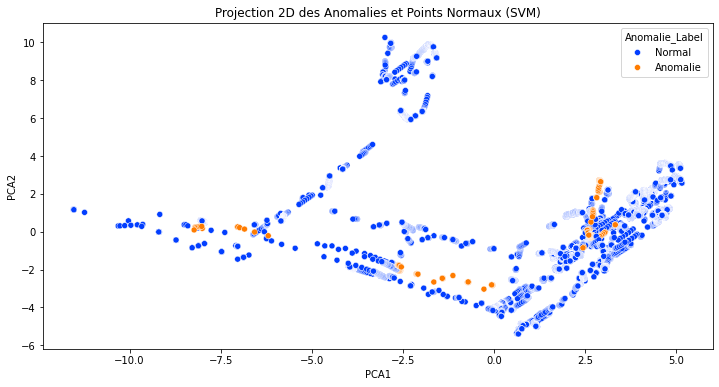

In [414]:
df_svm['PCA1'] = reduced_data[:, 0]
df_svm['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomalie_Label', palette='bright', data=df_svm)
plt.title("Projection 2D des Anomalies et Points Normaux (SVM)")
plt.show()

## Option 2 : Adversarial attacks against classification

### Isolation Forest Anomalies

In [415]:
X = df_if.drop(columns=['Anomalie_Label'])
y = df_if['Anomalie_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.9998971299249049


In [416]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Anomalie       0.97      1.00      0.98        28
      Normal       1.00      1.00      1.00      9693

    accuracy                           1.00      9721
   macro avg       0.98      1.00      0.99      9721
weighted avg       1.00      1.00      1.00      9721



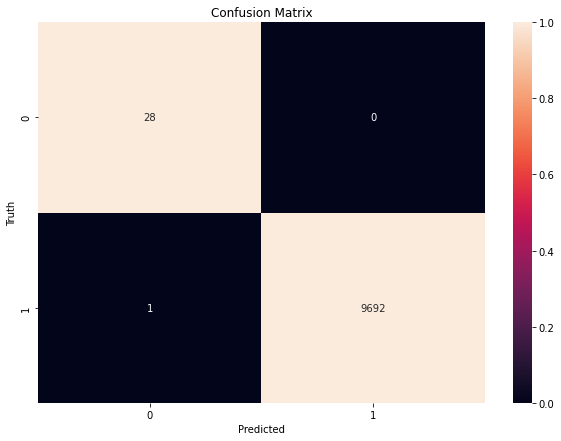

In [417]:
cm = confusion_matrix(y_test, y_pred)
cp = cm / cm.sum(axis=1)[:, np.newaxis] # Confusion Matrix Percentage
plt.figure(figsize=(10, 7))
sns.heatmap(cp, annot=cm, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

### One Class SVM Anomalies

In [418]:
X = df_svm.drop(columns=['Anomalie_Label'])
y = df_svm['Anomalie_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

1.0


In [419]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Anomalie       1.00      1.00      1.00        58
      Normal       1.00      1.00      1.00      9663

    accuracy                           1.00      9721
   macro avg       1.00      1.00      1.00      9721
weighted avg       1.00      1.00      1.00      9721



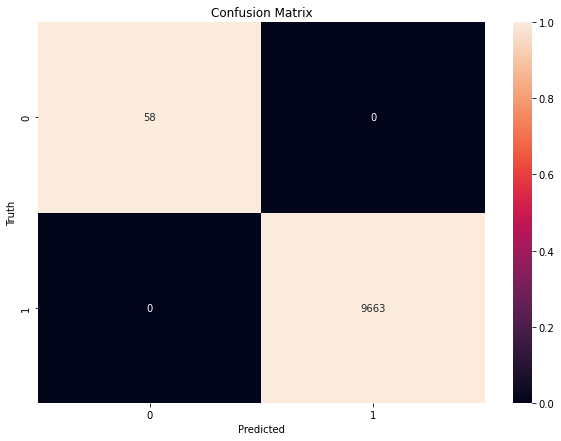

In [420]:
cm = confusion_matrix(y_test, y_pred)
cp = cm / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 7))
sns.heatmap(cp, annot=cm, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()